# Las podas de backtracking

Vamos a ver como funciona cada poda de backtracking por separado.

Hipotesis:
- Si el Jambotubo se llena con pocos productos la poda de factibilidad es más precisa
- Si el Jambotubo se llena con muchos productos la poda de optimalidad es más precisa

Para esto haremos el siguiente procedimiento:
1. Cremos instancias para distitnso $n$ entre 15 y 25, $r_i$ y $R$ entre 400 y 500, y los $w_i$ varian para el experimento:
    - $w_i$ entre 50 y 80 se llena muy rápido
    - $w_i$ entre 30 y 50 se llena un poco menos rápido
    - $w_i$ entre 20 y 40 se llena un poco lento
    - $w_i$ entre 10 y 30 se llena lento
2. Tomamos muestras de la ejecución de ambas muestras en tres algoritmos propuestos:
    1. Backtracking full, ambas podas.
    2. Fuerza bruta + poda de factibilidad. Sin poda de optimalidad.
    3. Fuerza bruta + poda de optimalidad. Sin poda de factibilidad.
3. Graficamos la comparación del tiempo de ejecución

In [60]:
# Importamos librerias
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy import stats

In [61]:
# Carpeta general
!rm -rf ../instancias/podas
!mkdir ../instancias/podas

In [62]:
# Generador de instancias

default_ns =  np.arange(15, 30)
default_k = 10

def gen(
    _w,
    _path,
    ns = default_ns,
    k = default_k,
    _R = (400, 500),
    _r = (400, 500)
):
    for i in ns:
        for j in range(k):
            R = np.random.randint((_R[1] - _R[0])) + _R[0]
            w = np.random.randint((_w[1] - _w[0]), size = i) + _w[0]
            r = np.random.randint((_r[1] - _r[0]), size = i) + _r[0]
            f = open((_path + "{}_{}.in").format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            for l in range(i-1):
                f.write("{} {}\n".format(w[l], r[l]))
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()

In [63]:
# Experimento

def experimentar(path, ns = default_ns):
    timepos_ambas = []
    tiempos_opt = []
    tiempos_fact = []

    for i in ns:
        tiempo_acum_ambas = []
        tiempo_acum_opt = []
        tiempo_acum_fact = []

        for j in range(_k):
            start = time.time()
            os.system(("./../algo3-tp1 ./../" + path + "{}_{}.in 2").format(i, j))
            tiempo_acum_ambas.append(time.time() - start)

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 5".format(i, j))
            tiempo_acum_opt.append(time.time() - start)

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 4".format(i, j))
            tiempo_acum_fact.append(time.time() - start )


        timepos_ambas.append(tiempo_acum_ambas)
        tiempos_opt.append(tiempo_acum_opt)
        tiempos_fact.append(tiempo_acum_fact)
    
    return [timepos_ambas, tiempos_opt, tiempos_fact]

In [64]:
def graf_prom(y, i, color, label, ns = default_ns):
    prom_ambas = [np.mean(y[i][j]) for j in range(len(y[0]))]
    plt.plot(ns, prom_ambas, color = color, label = label)

def graficar(y, i, color, ns = default_ns):
    rows = [[] for j in range(_k)]
    
    for j in range(_k):
        for k in range(ns.size):
            rows[j].append(y[i][k][j])
    for j in range(len(rows)):
        plt.scatter(ns + i * 0.02, rows[j], color = color, alpha=0.8, s = 10)

### Muy pesados

In [65]:
# Generacion de casos
!rm -rf ../instancias/podas/pesados
!mkdir ../instancias/podas/pesados
gen((50, 80), "../instancias/podas/pesados/")

In [66]:
# Ejecución
os.system("g++ ../src/main.cpp -o ../algo3-tp1")
y_pesados = experimentar("instancias/podas/pesados/")

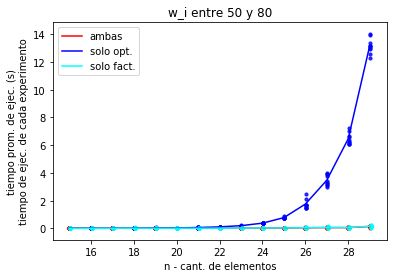

In [67]:
graf_prom(y_pesados, 0, 'red', 'ambas')
graf_prom(y_pesados, 1, 'blue', 'solo opt.')
graf_prom(y_pesados, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_pesados, 0, 'red')
graficar(y_pesados, 1, 'blue')
graficar(y_pesados, 2, 'cyan')

plt.title('w_i entre 50 y 80')
plt.xlabel('n - cant. de elementos')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')

plt.show()

### No tan pesados

In [68]:
# Generacion de casos
!rm -rf ../instancias/podas/no_tan_pesados
!mkdir ../instancias/podas/no_tan_pesados
gen((30, 50), "../instancias/podas/no_tan_pesados/")

In [69]:
# Ejecución
os.system("g++ ../src/main.cpp -o ../algo3-tp1")
y_no_tan_pesados = experimentar("instancias/podas/no_tan_pesados/")

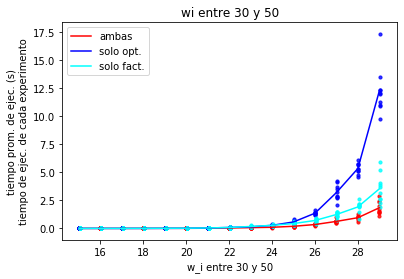

In [70]:
graf_prom(y_no_tan_pesados, 0, 'red', 'ambas')
graf_prom(y_no_tan_pesados, 1, 'blue', 'solo opt.')
graf_prom(y_no_tan_pesados, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_no_tan_pesados, 0, 'red')
graficar(y_no_tan_pesados, 1, 'blue')
graficar(y_no_tan_pesados, 2, 'cyan')

plt.xlabel('w_i entre 30 y 50')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')
plt.title('wi entre 30 y 50')

plt.show()

### No tan livianos

In [71]:
# Generacion de casos
!rm -rf ../instancias/podas/no_tan_livianos
!mkdir ../instancias/podas/no_tan_livianos
gen((20, 40), "../instancias/podas/no_tan_livianos/")

In [72]:
# Ejecución
os.system("g++ ../src/main.cpp -o ../algo3-tp1")
y_no_tan_livianos = experimentar("instancias/podas/no_tan_livianos/")

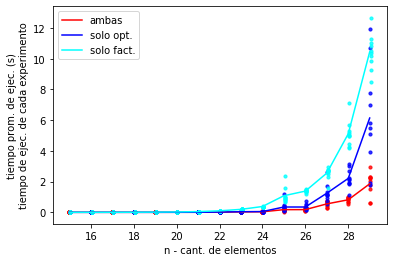

In [73]:
graf_prom(y_no_tan_livianos, 0, 'red', 'ambas')
graf_prom(y_no_tan_livianos, 1, 'blue', 'solo opt.')
graf_prom(y_no_tan_livianos, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_no_tan_livianos, 0, 'red')
graficar(y_no_tan_livianos, 1, 'blue')
graficar(y_no_tan_livianos, 2, 'cyan')

plt.xlabel('w_i entre 20 y 40')
plt.xlabel('n - cant. de elementos')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')

plt.show()

### Livianos

In [74]:
# Generacion de casos
!rm -rf ../instancias/podas/livianos
!mkdir ../instancias/podas/livianos
gen((10, 30), "../instancias/podas/livianos/")

In [75]:
# Ejecución
y_livianos = experimentar("instancias/podas/livianos/")

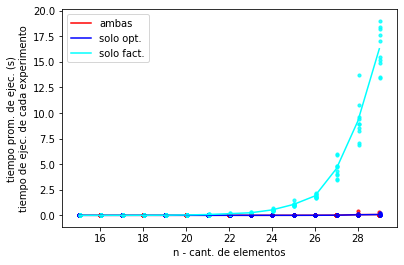

In [76]:
graf_prom(y_livianos, 0, 'red', 'ambas')
graf_prom(y_livianos, 1, 'blue', 'solo opt.')
graf_prom(y_livianos, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_livianos, 0, 'red')
graficar(y_livianos, 1, 'blue')
graficar(y_livianos, 2, 'cyan')

plt.xlabel('w_i entre 10 y 30')
plt.xlabel('n - cant. de elementos')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')

plt.show()

<hr />

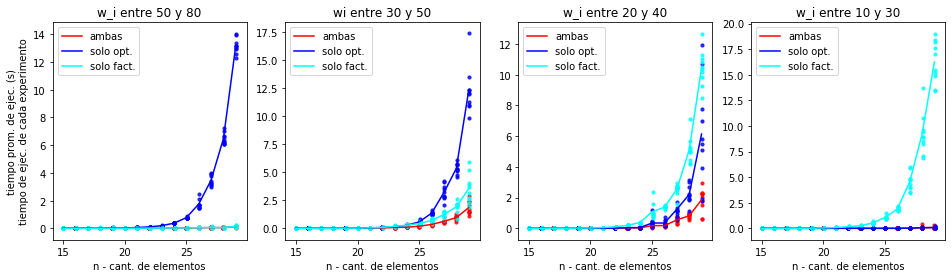

In [91]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(16, 4))

plt.subplot(141)

graf_prom(y_pesados, 0, 'red', 'ambas')
graf_prom(y_pesados, 1, 'blue', 'solo opt.')
graf_prom(y_pesados, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_pesados, 0, 'red')
graficar(y_pesados, 1, 'blue')
graficar(y_pesados, 2, 'cyan')

plt.title('w_i entre 50 y 80')
plt.xlabel('n - cant. de elementos')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')

plt.subplot(142)

graf_prom(y_no_tan_pesados, 0, 'red', 'ambas')
graf_prom(y_no_tan_pesados, 1, 'blue', 'solo opt.')
graf_prom(y_no_tan_pesados, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_no_tan_pesados, 0, 'red')
graficar(y_no_tan_pesados, 1, 'blue')
graficar(y_no_tan_pesados, 2, 'cyan')

plt.title('wi entre 30 y 50')
plt.xlabel('n - cant. de elementos')

plt.subplot(143)

graf_prom(y_no_tan_livianos, 0, 'red', 'ambas')
graf_prom(y_no_tan_livianos, 1, 'blue', 'solo opt.')
graf_prom(y_no_tan_livianos, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_no_tan_livianos, 0, 'red')
graficar(y_no_tan_livianos, 1, 'blue')
graficar(y_no_tan_livianos, 2, 'cyan')

plt.title('w_i entre 20 y 40')
plt.xlabel('n - cant. de elementos')

plt.subplot(144)

graf_prom(y_livianos, 0, 'red', 'ambas')
graf_prom(y_livianos, 1, 'blue', 'solo opt.')
graf_prom(y_livianos, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(y_livianos, 0, 'red')
graficar(y_livianos, 1, 'blue')
graficar(y_livianos, 2, 'cyan')

plt.title('w_i entre 10 y 30')
plt.xlabel('n - cant. de elementos')

plt.show()